## Vidushi

In [161]:
Importing Libraries

SyntaxError: invalid syntax (<ipython-input-161-952af682003d>, line 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score ,f1_score,r2_score,roc_curve,roc_auc_score,balanced_accuracy_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import pickle

Using TensorFlow backend.


Importing Data 

In [2]:
data = pd.read_csv('data/processedData.csv')

converting target valiable, y, from 'yes' or 'no' to '1' and '0' respectively. Dropped 'unnamed' column

In [3]:
data.y.replace(to_replace = ['yes','no'], value = [1,0],inplace = True)
data.drop('Unnamed: 0',axis = 1,inplace = True)    

In [4]:
y=data['y']
X=data.drop(columns=['y'])

In [5]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,5,261,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,5,149,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,3,226,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,3,151,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,5,307,1,3,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Splitting the dataset into training and testing data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=16)

Smote Data

In [10]:
sm = SMOTE(random_state=16)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

# Decision Tree

Decision Tree using Imbalanced Data

In [11]:
tree = DecisionTreeClassifier(random_state=16)

In [12]:
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [13]:
model_tree = tree.fit(X_train,y_train)

In [14]:
y_pred_tree = model_tree.predict(X_test)

In [15]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_tree)*100,2)}%")

Balanced Accuracy: 72.82%


In [16]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10934
           1       0.51      0.52      0.52      1423

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [17]:
print(confusion_matrix(y_test,y_pred_tree))

[[10215   719]
 [  680   743]]


*Decision Tree using SMOTE Data*

In [18]:
smote_model_tree = tree.fit(X_SMOTE,y_SMOTE)

In [19]:
smote_y_pred_tree = smote_model_tree.predict(X_test)

In [20]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test,smote_y_pred_tree)*100,2)}%")

Balanced Accuracy: 72.96%


In [21]:
print(classification_report(y_test,smote_y_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10934
           1       0.50      0.53      0.51      1423

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



# Optimization 

In [113]:
param_grid = {'criterion': ['gini','entropy'],
               'max_depth':[10,15],
              'min_samples_leaf': [3,5,8]}
grid = GridSearchCV(smote_model_tree, param_grid, cv=4, scoring = 'balanced_accuracy')
smote_best_param_tree = grid.fit(X_SMOTE,y_SMOTE)

In [114]:
smote_best_param_tree.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}

In [111]:
smote_tree_tuned = DecisionTreeClassifier(criterion = 'gini',max_depth = 15,min_samples_leaf = 3,random_state=16)

In [112]:
smote_model_tree_tuned = smote_tree_tuned.fit(X_SMOTE,y_SMOTE)
smote_y_pred_tree_tuned = smote_model_tree_tuned.predict(X_test)
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_tree_tuned)*100,2)}%")
print(classification_report(y_test,smote_y_pred_tree_tuned))

Balanced Accuracy: 73.66%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10934
           1       0.52      0.54      0.53      1423

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



# ROC  

ROC function

In [116]:
# generate a no skill prediction (majority class)
def ROC_function(model,X_test,y_test):
    noskill_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    prob = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    prob = prob[:, 1]
    # calculate scores
    noskill_auc = roc_auc_score(y_test, noskill_probs)
    auc = roc_auc_score(y_test, prob)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (noskill_auc))
    print('RF: ROC AUC=%.3f' % (auc))
    # calculate roc curves
    noskill_fpr, noskill_tpr, _ = roc_curve(y_test, noskill_probs)
    fpr, tpr, _ = roc_curve(y_test, prob)
    # plot the roc curve for the model
    plt.figure(figsize=(16,8))
    plt.plot(noskill_fpr, noskill_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='RF')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

No Skill: ROC AUC=0.500
RF: ROC AUC=0.830


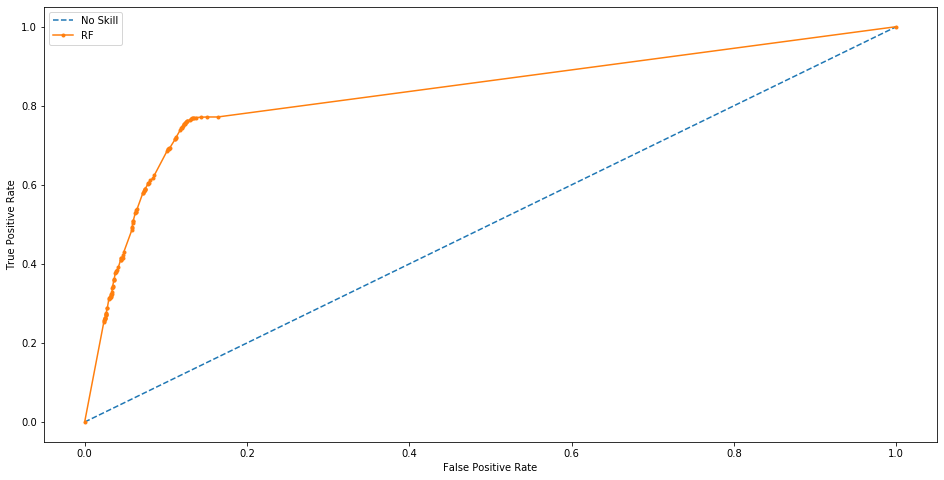

In [118]:
ROC_function(smote_tree_tuned,X_test,y_test)

# Random Forest

Random Forest using Imbalanced Data

In [120]:
forest = RandomForestClassifier(random_state = 16)
forest.fit(X_train,y_train)
y_pred_rf = forest.predict(X_test)

In [121]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_rf)*100,2)}%")

Balanced Accuracy: 71.74%


In [122]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10934
           1       0.65      0.47      0.54      1423

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



Random Forest using SMOTE Data

In [123]:
forest.fit(X_SMOTE,y_SMOTE)
smote_y_pred_rf = forest.predict(X_test)

In [124]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_rf)*100,2)}%")

Balanced Accuracy: 73.01%


In [125]:
print(classification_report(y_test,smote_y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10934
           1       0.61      0.50      0.55      1423

    accuracy                           0.91     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



*Optimization*

In [128]:
criterion = ['gini','entropy']
n_estimators = [100,200,500]
max_depth = [3, 5, 8]
max_features = [4,6,8]
min_samples_leaf =[1,2,4]

hyperF = dict( criterion = criterion,n_estimators = n_estimators, max_depth = max_depth,  
               max_features = max_features,min_samples_leaf=min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 4,n_jobs = -1,scoring = 'balanced_accuracy')
smote_best_param_rf = gridF.fit(X_SMOTE,y_SMOTE)

In [129]:
smote_best_param_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [130]:
smote_rf_tuned = RandomForestClassifier(criterion = 'entropy',n_estimators = 100, max_depth = 8,max_features = 6,min_samples_leaf=2,random_state=16)

In [131]:
smote_model_rf_tuned = smote_rf_tuned.fit(X_SMOTE,y_SMOTE)

In [132]:
smote_y_pred_rf_tuned = smote_model_rf_tuned.predict(X_test)

In [133]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_rf_tuned)*100,2)}%")

Balanced Accuracy: 78.77%


In [134]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, smote_y_pred_rf_tuned)*100,2)}%")

Accuracy: 88.71%


In [135]:
print(classification_report(y_test,smote_y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10934
           1       0.51      0.66      0.57      1423

    accuracy                           0.89     12357
   macro avg       0.73      0.79      0.75     12357
weighted avg       0.90      0.89      0.89     12357



# ROC

No Skill: ROC AUC=0.500
RF: ROC AUC=0.929


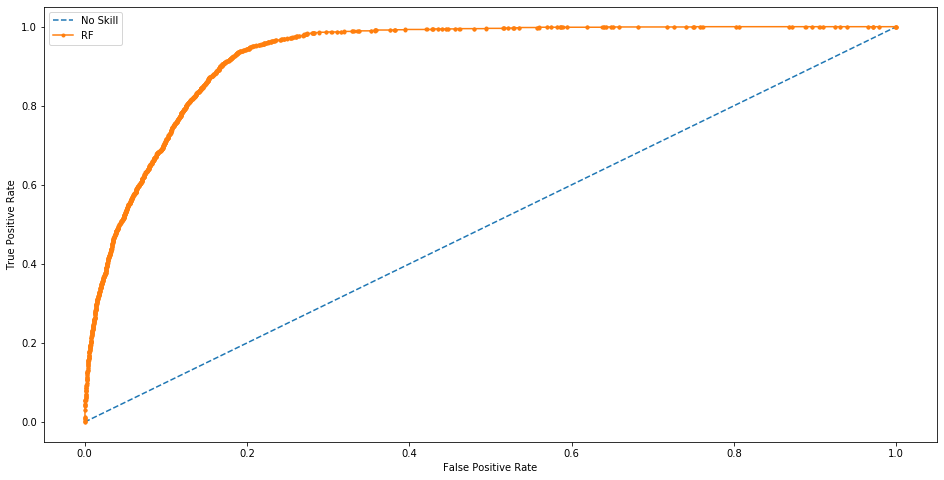

In [136]:
# generate a no skill prediction (majority class)
ROC_function(smote_model_rf_tuned,X_test,y_test)

# Feature Importance

In [137]:
feature_imp = pd.Series(smote_rf_tuned.feature_importances_,index=X_SMOTE.columns).sort_values(ascending=False)
feature_imp

duration                         0.231208
nr.employed                      0.085292
euribor3m                        0.084443
emp.var.rate                     0.061189
pdays                            0.044283
cons.conf.idx                    0.043082
contact_telephone                0.038549
poutcome_nonexistent             0.030912
cons.price.idx                   0.029047
default_unknown                  0.026750
month_may                        0.023751
job_blue-collar                  0.022674
housing_yes                      0.021333
housing_no                       0.019084
poutcome_failure                 0.016905
day_of_week_mon                  0.016271
marital_married                  0.014934
education_high.school            0.012825
contact_cellular                 0.011962
marital_single                   0.011746
default_no                       0.011692
day_of_week_fri                  0.010651
day_of_week_tue                  0.010266
day_of_week_thu                  0

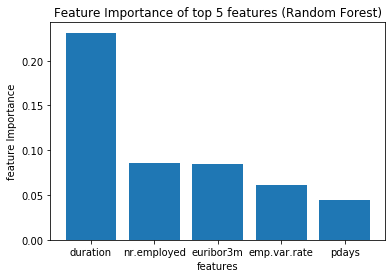

In [138]:
plt.bar(feature_imp.index[:5],feature_imp[:5])
plt.xlabel("features")
plt.ylabel("feature Importance")
plt.title("Feature Importance of top 5 features (Random Forest)")
plt.show()

# Gradient Boosting Machine

Gradient Boosting using imbalanced data

In [139]:
gb = GradientBoostingClassifier(random_state = 16)

In [140]:
model_gb = gb.fit(X_train,y_train)

In [141]:
y_pred_gb = model_gb.predict(X_test)

In [142]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, y_pred_gb)*100,2)}%")

Balanced Accuracy: 74.8%


In [143]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10934
           1       0.67      0.53      0.59      1423

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



Gradient Boosting using SMOTE data

In [144]:
smote_model_gb = gb.fit(X_SMOTE,y_SMOTE)


In [145]:
smote_y_pred_gb = smote_model_gb.predict(X_test)

In [146]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_gb)*100,2)}%")

Balanced Accuracy: 79.76%


In [147]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, smote_y_pred_gb)*100,2)}%")

Accuracy: 91.12%


In [148]:
print(classification_report(y_test,smote_y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10934
           1       0.61      0.65      0.63      1423

    accuracy                           0.91     12357
   macro avg       0.78      0.80      0.79     12357
weighted avg       0.91      0.91      0.91     12357



# Optimization

In [149]:
n_estimators = [100,200,500]
max_depth = [3, 5, 8]
max_features = [7,9]
min_samples_leaf =[1,2,4]

paramgrid_gbm = dict(n_estimators = n_estimators, max_depth = max_depth,  
               max_features = max_features,min_samples_leaf=min_samples_leaf)

grid_gbm = GridSearchCV(gb, paramgrid_gbm, cv = 4,n_jobs = -1,scoring = 'balanced_accuracy')
smote_best_param_gbm = grid_gbm.fit(X_SMOTE,y_SMOTE)

In [150]:
smote_best_param_gbm.best_params_

{'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 4, 'n_estimators': 100}

In [151]:
smote_gb_tuned = GradientBoostingClassifier(n_estimators=100,max_depth = 3,max_features = 7,min_samples_leaf = 4,random_state=16)

In [152]:
smote_gb_tuned = GradientBoostingClassifier(n_estimators=500,max_depth = 3,max_features = 7,random_state=16)

In [153]:
smote_gb_tuned.fit(X_SMOTE,y_SMOTE)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=16, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [154]:
pkl_filename = 'GBM_model8.pkl'
with open (pkl_filename,'wb') as file:
    pickle.dump(smote_rf_tuned,file)

In [155]:
smote_y_pred_gb_tuned = smote_gb_tuned.predict(X_test)

In [156]:
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(y_test, smote_y_pred_gb_tuned)*100,2)}%")

Balanced Accuracy: 75.01%


In [157]:
print(classification_report(y_test,smote_y_pred_gb_tuned))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10934
           1       0.65      0.54      0.59      1423

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



# ROC

No Skill: ROC AUC=0.500
RF: ROC AUC=0.946


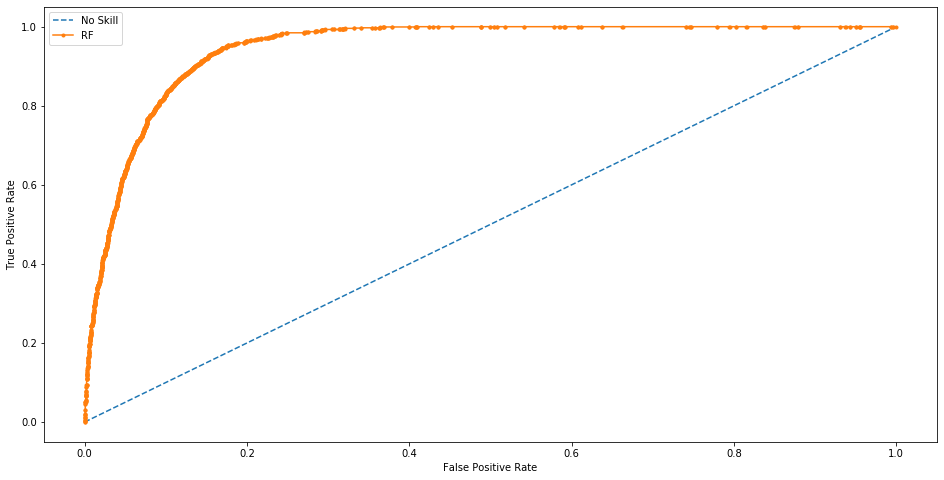

In [158]:
ROC_function(smote_gb_tuned,X_test,y_test)

# Feature Importance

In [159]:
feature_imp_gbm = pd.Series(smote_gb_tuned.feature_importances_,index=X_SMOTE.columns).sort_values(ascending=False)
feature_imp_gbm

duration                         0.294006
nr.employed                      0.116306
euribor3m                        0.060844
emp.var.rate                     0.053117
marital_married                  0.041275
pdays                            0.037904
cons.conf.idx                    0.035610
marital_single                   0.026662
housing_no                       0.026468
day_of_week_mon                  0.021111
housing_yes                      0.020854
job_blue-collar                  0.019055
contact_telephone                0.017757
day_of_week_thu                  0.016718
month_may                        0.016404
day_of_week_fri                  0.016038
education_high.school            0.015730
day_of_week_tue                  0.014657
marital_divorced                 0.013696
default_unknown                  0.013549
poutcome_failure                 0.011857
day_of_week_wed                  0.011473
contact_cellular                 0.010637
education_university.degree      0

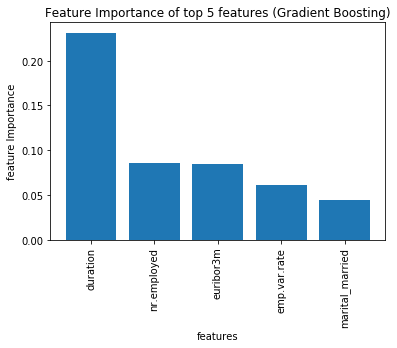

In [160]:
plt.bar(feature_imp_gbm.index[:5],feature_imp[:5])
plt.xlabel("features")
plt.ylabel("feature Importance")
plt.title("Feature Importance of top 5 features (Gradient Boosting)")
plt.xticks(rotation=90)
plt.show()